# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

1-3: Photos uploaded in GitHub

4. A non-decreasing transformation will not affect the median because the median only depends on rank order and that transformation will not alter that order. Similarly since quantile is also calcualted based on rank order it will also not be affected. However, the IQR and range generally do change as their numeric values are different, but may be preserved with linear transforamtion. 

5. No, generally transforing a function then averaging is not the same as averaging then transforming. For example if we had the numbers 1 and 2 and the non-decreasing function x^2, m(g(X)) = 2 and g(m(x)) = 2.25. 

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [112]:
import pandas as pd
import numpy as np
bnbData = pd.read_csv("data/airbnb_hw.csv")

Question 2: There are 13 columns and 30478 observations. The variables are HostID, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating, Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, and Review Scores Rating. 


In [113]:

bnbData.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [114]:
bnbData.shape

(30478, 13)

In [115]:
compare = pd.crosstab(bnbData['Room Type'],bnbData['Property Type'])
print(compare)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

Question 3: The most common rental is an entire apartment followed by a private room in a house. It is more likely to see an entire home/apt available for most listings. However, for bed & breakfasts, dorms, houses, and other it is more common to see a private room rather than an entire home/apt. 

In [116]:
import matplotlib.pylab as plt

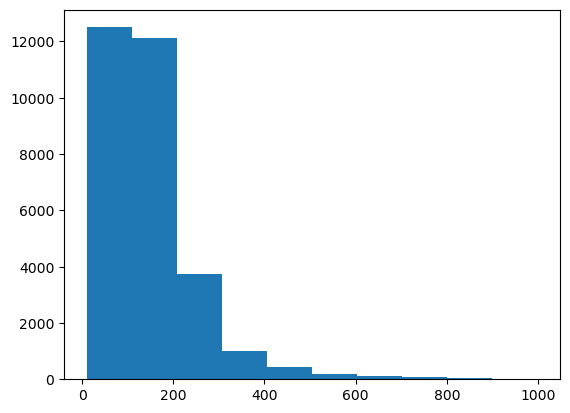

In [117]:
bnbData["Price"] = pd.to_numeric(bnbData["Price"], errors="coerce")

price = bnbData.Price
plt.hist(price)
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

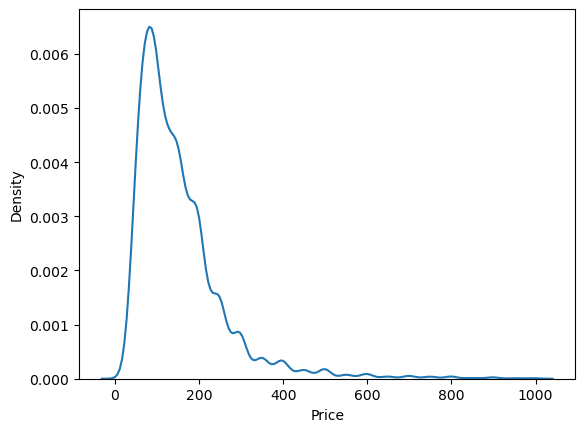

In [118]:
import seaborn as sns

sns.kdeplot(data=bnbData, x="Price")

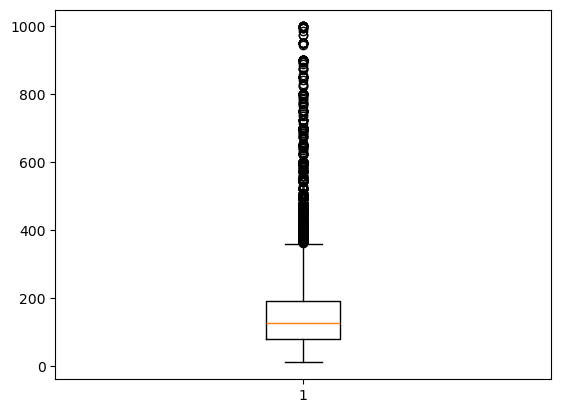

In [119]:
price = price.dropna()

plt.boxplot(price)
plt.show()

In [120]:
price.describe()

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64

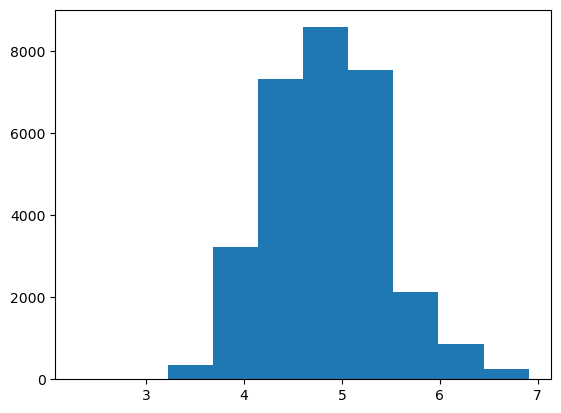

In [121]:
price_log = np.log(price)

bnbData['Price Log'] = price_log

plt.hist(price_log)
plt.show()

<Axes: xlabel='Price Log', ylabel='Density'>

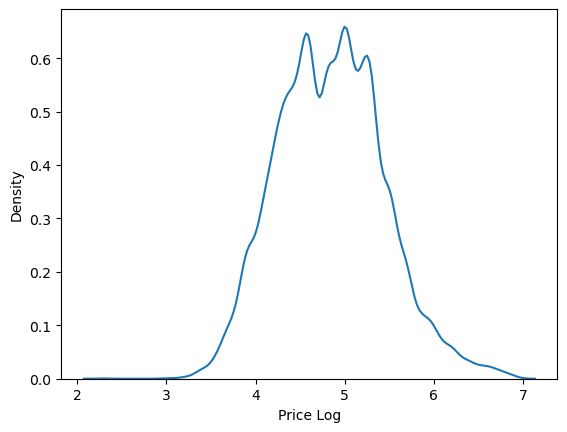

In [122]:
sns.kdeplot(data=bnbData, x="Price Log")

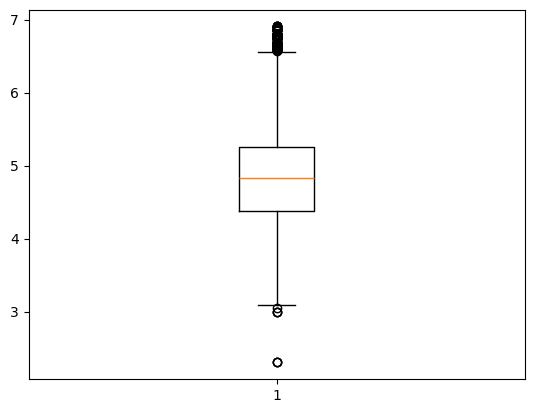

In [123]:
plt.boxplot(price_log)
plt.show()

In [124]:
price_log.describe()

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: Price, dtype: float64

Question 4: The data is heavily right-skewed in both the histogram and density plot, with several outliers present. The mean is around 153, but many rentals are priced substantially higher. After applying a log transformation, the distribution appears much closer to normal, with fewer outliers, though some remain at both the lower and higher ends of Airbnb prices.

<Axes: xlabel='Beds', ylabel='Price Log'>

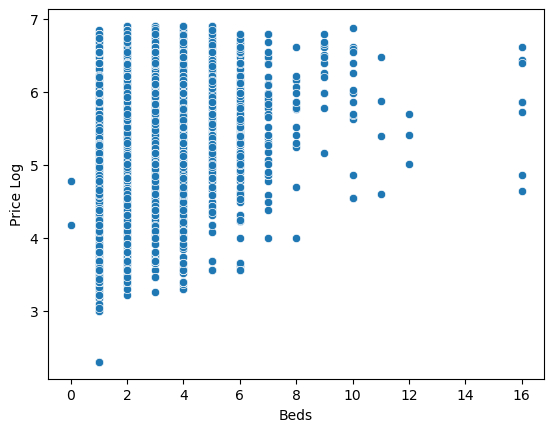

In [125]:

sns.scatterplot(x="Beds", y = "Price Log", data=bnbData)

In [126]:
bnbData.groupby('Beds')["Price"].agg(["count", "mean", "std", "min", "max"])

,count,mean,std,min,max
Beds,,,,,
0.0,2,92.000000,38.183766,65.0,119.0
1.0,20307,124.757670,75.685752,10.0,950.0
2.0,6561,186.702332,115.044205,25.0,999.0
3.0,2029,234.928043,142.288189,26.0,999.0
4.0,766,280.554830,175.512312,27.0,999.0
5.0,274,322.000000,190.319415,35.0,995.0
6.0,166,316.313253,201.157585,35.0,900.0
7.0,45,341.377778,220.116631,55.0,900.0
8.0,20,331.850000,155.652202,55.0,750.0


Question 5: The scatterplot shows an upward trend in log price as bedroom count increases, with dispersion widening at higher counts (heteroskedasticity). Most listings have 1–7 bedrooms; higher counts are sparse and include several outliers. Grouped means rise steadily from 1 to about 5 bedrooms, then become noisier, with a pronounced jump at 9 bedrooms likely driven by a few high-end listings. The standard deviation generally increases with bedroom count, reflecting greater price variation and small-sample volatility at the high end.

 6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

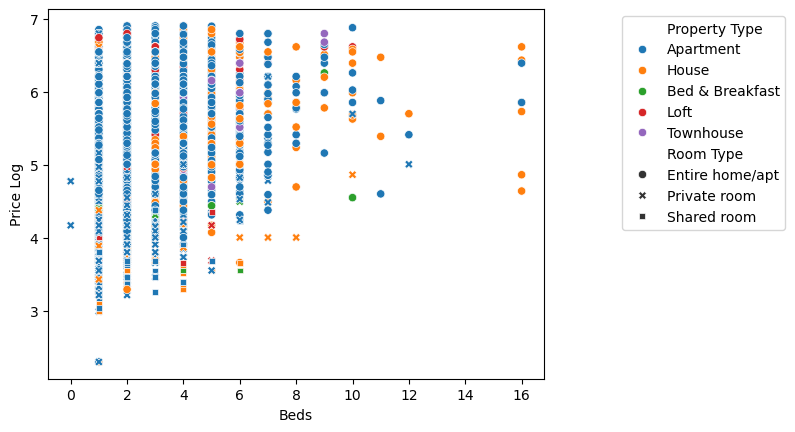

In [111]:
top_props = bnbData['Property Type'].value_counts().head(5).index
plot_df = bnbData.query("`Property Type` in @top_props")

this_plot = sns.scatterplot(data=plot_df, x="Beds", y="Price Log", hue="Property Type", style="Room Type") # Two kinds of grouping
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.5, 1)) # Moves the Legend


In [129]:
var = 'Price'
group = 'Property Type'
prop = bnbData.loc[:,[group,var]].groupby(group).describe()



In [130]:
var = 'Price'
group = 'Room Type'
room = bnbData.loc[:,[group,var]].groupby(group).describe()

In [131]:
bnbData.loc[:,['Property Type','Room Type','Price']].groupby(['Property Type','Room Type']).describe()

Price                                 \
                                   count        mean         std    min   
Property Type   Room Type                                                 
Apartment       Entire home/apt  15550.0  200.210161  109.967435   10.0   
                Private room     10741.0   91.605903   46.356168   10.0   
                Shared room        684.0   77.853801   57.875888   20.0   
Bed & Breakfast Entire home/apt     13.0  184.538462  119.814172   85.0   
                Private room       155.0   97.161290   47.031971   32.0   
                Shared room         12.0  143.666667  245.328104   30.0   
Boat            Entire home/apt      7.0  158.428571   51.110524  100.0   
                Private room         1.0  120.000000         NaN  120.0   
Bungalow        Entire home/apt      4.0  150.750000   46.464144   87.0   
Cabin           Entire home/apt      1.0  250.000000         NaN  250.0   
                Private room         1.0   80.000000         NaN   80.0   
Camper/RV       Entire home/apt      6.0  114.333333  107.685963   45.0   
                Private room         1.0   39.000000         NaN   39.0   
Castle          Private room         1.0  150.000000         NaN  150.0   
Chalet          Private room         1.0   99.000000         NaN   99.0   
Condominium     Entire home/apt     71.0  281.126761  175.313998   80.0   
                Private room        22.0   98.590909   40.576394   46.0   
Dorm            Entire home/apt      4.0   44.250000   24.060687   30.0   
                Private room        16.0   86.562500   40.738137   50.0   
                Shared room         11.0   73.181818   46.328864   30.0   
House           Entire home/apt    723.0  234.554633  159.785974   27.0   
                Private room      1258.0   77.750397   49.402650   25.0   
                Shared room         79.0   46.822785   25.152743   10.0   
Hut             Private room         2.0   75.000000   35.355339   50.0   
Lighthouse      Entire home/apt      1.0   39.000000         NaN   39.0   
Loft            Entire home/apt    379.0  284.910290  184.515517   55.0   
                Private room       310.0   99.077419   63.875489   39.0   
                Shared room         49.0   78.816327   87.521824   30.0   
Other           Entire home/apt     10.0  290.800000  273.526273   66.0   
                Private room        28.0  176.642857  141.484252   39.0   
                Shared room          4.0  148.750000  134.806961   70.0   
Tent            Private room         4.0  126.250000   94.989034   40.0   
Townhouse       Entire home/apt     81.0  242.037037  166.755243   66.0   
                Private room        52.0   83.365385   30.578109   45.0   
                Shared room          1.0   95.000000         NaN   95.0   
Treehouse       Private room         1.0   95.000000         NaN   95.0   
                Shared room          3.0  167.666667  114.788211   95.0   
Villa           Entire home/apt      3.0  206.333333   89.667906  120.0   
                Private room         4.0  126.250000   71.107313   60.0   

                                                               
                                    25%    50%     75%    max  
Property Type   Room Type                                      
Apartment       Entire home/apt  135.00  175.0  230.00  999.0  
                Private room      65.00   82.0  101.00  999.0  
                Shared room       49.00   66.0   90.00  950.0  
Bed & Breakfast Entire home/apt  121.00  130.0  220.00  525.0  
                Private room      65.00   85.0  117.00  260.0  
                Shared room       42.50   65.0   81.00  900.0  
Boat            Entire home/apt  122.50  150.0  182.00  250.0  
                Private room     120.00  120.0  120.00  120.0  
Bungalow        Entire home/apt  133.50  160.5  177.75  195.0  
Cabin           Entire home/apt  250.00  250.0  250.00  250.0  
                Private room      80.00   80.0   80.

Question 6: It is somewhat difficult to see clearly in this scatterplot, but a few patterns stand out. Entire homes/apartments tend to be the most expensive, followed by private rooms, with shared rooms generally being the least expensive. As the number of beds increases, shared rooms disappear, leaving almost exclusively entire rentals. Apartments are the most common property type across all bed counts, showing a wide spread of prices, while other property types appear less frequently. Even after the log transformation, there are still a few unusually high or low listings for a given bed count. From the Room Type × Property Type comparison, the “Other” property type within Entire home/apt has the highest average price (≈$290), but this group is small and also has the largest standard deviation (≈$273.5). Next are Entire lofts (mean ≈$284), followed by Entire condominium (≈$218). Large standard deviations also show up for Entire lofts (≈$284.9) and Condominiums (≈$281.1). Because raw prices are right-skewed with outliers, the median is a more reliable measure of central tendency than the mean.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [156]:
drillData = pd.read_csv("data/drilling_rigs.csv")
drillData.head()


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [ ]:
print(drillData.shape)
print(drillData.dtypes)

(623, 10)
Month                                                                                          datetime64[ns]
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                            int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                           int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                             object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                           object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)             object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)            object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)               object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                              int64


Question 1: There are 623 observations and 10 variables. Four variables are correctly read in while six of the variables need to be converted to numeric types, which can be done by using pd.tonumeric and errors set equal to coerced. There are also a lot of columns with "Not Available" so to drop them if needed, -- use replace to change Not Available to np.nan to be a true NA value then use .dropna to remove these values. 

In [176]:
drillData['Month'] = pd.to_datetime(drillData['Month'], format="mixed", errors="coerce")
drillData.head()


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973-01-01,1120,99,NaN,NaN,NaN,NaN,NaN,1219,1549
1,1973-02-01,1037,89,NaN,NaN,NaN,NaN,NaN,1126,1677
2,1973-03-01,959,90,NaN,NaN,NaN,NaN,NaN,1049,1805
3,1973-04-01,914,79,NaN,NaN,NaN,NaN,NaN,993,1898
4,1973-05-01,974,72,NaN,NaN,NaN,NaN,NaN,1046,1991


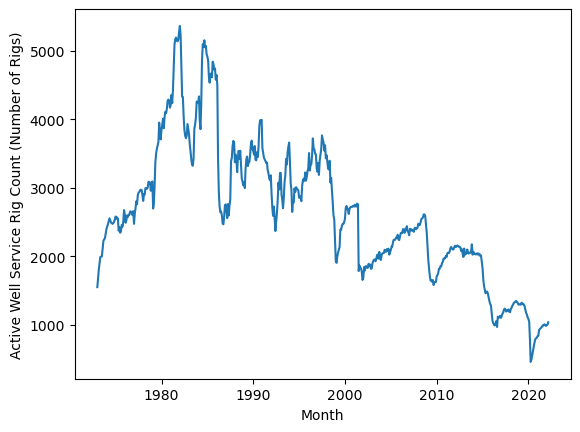

In [180]:
drillData = drillData.replace("Not Available", np.nan)

drillData = drillData.dropna(subset=['Month', 'Active Well Service Rig Count (Number of Rigs)'])
drillData["Active Well Service Rig Count (Number of Rigs)"] = pd.to_numeric(drillData['Active Well Service Rig Count (Number of Rigs)'], errors = "coerce")

fig = sns.lineplot(data = drillData,  x = 'Month',
                   y = 'Active Well Service Rig Count (Number of Rigs)')
plt.show()

The rig count surges through the late 1970s, peaks in the early 1980s, then plunges around 1982. It rebounds in the mid-1980s but never back to the prior high, and from there it cycles lower—sharp drops in the early 2000s, 2008–09, and 2014–16—before the steep collapse in 2020. Overall, the highs and lows stair-step down over time.

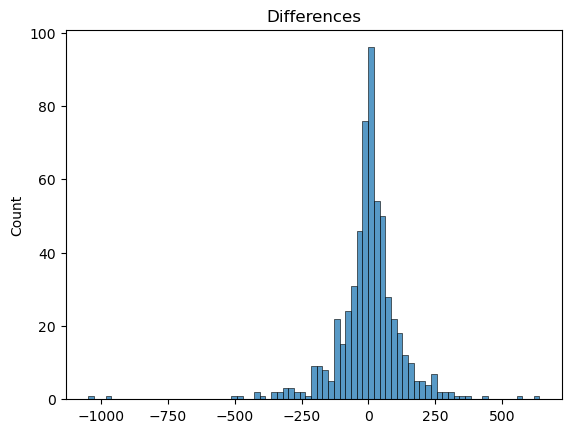

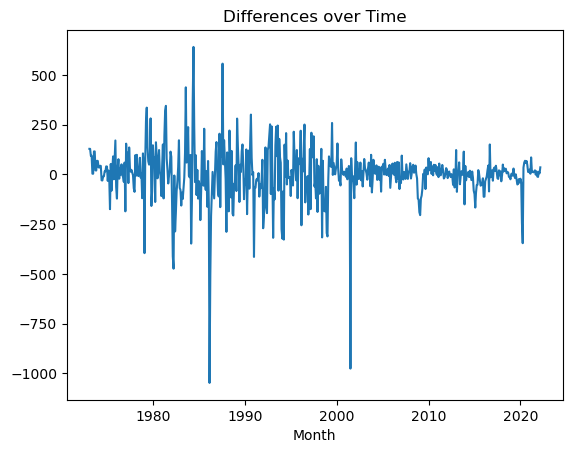

In [ ]:
y = drillData["Active Well Service Rig Count (Number of Rigs)"].to_numpy()
t = len(y)

diff = y[1:]-y[:(t-1)]

fig = sns.histplot(diff)
fig.set(title='Differences')
plt.show()


fig = sns.lineplot(x=drillData['Month'][1:],y=diff) 
fig.set(title='Differences over Time')
plt.show()

The histogram of first differences peaks sharply at 0, with most monthly changes within ±100 rigs. The distribution has heavy tails, indicating occasional large shocks (especially on the downside). The differences-over-time plot shows high variability in the late 1970s–1990s and another extreme negative spike in the early 2000s. After that, month-to-month moves are relatively smaller and more consistent, aside from episodic downturns.

In [ ]:
melts = drillData.melt(id_vars="Month", value_vars=["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"])
melts.head()

,Month,variable,value
0,1973-01-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1120
1,1973-02-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1037
2,1973-03-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,959
3,1973-04-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,914
4,1973-05-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,974


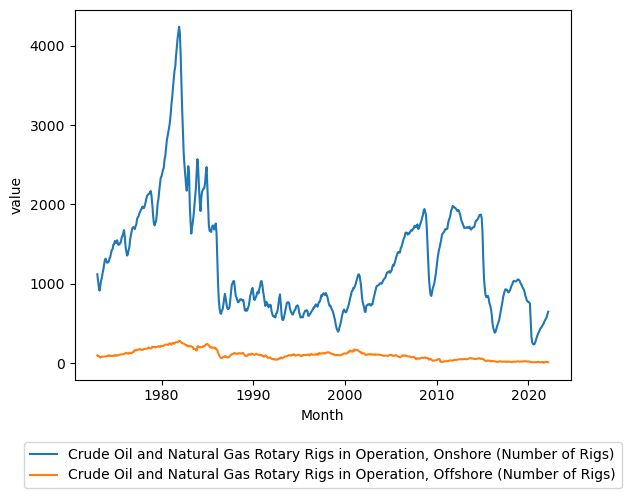

In [200]:
sns.lineplot(data=melts,x='Month',y='value',hue='variable')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15))


Sources: 
https://en.wikipedia.org/wiki/Covariance
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html
ChatGPT to debug and help with graph formatting